In [1]:
import pandas as pd

## Загрузка данных и объединение таблиц

In [168]:
salary_list = pd.read_html('https://worldpopulationreview.com/country-rankings/median-income-by-country')
salary = pd.DataFrame(salary_list[0])
salary.head()

,Country,Median Income,Mean Income,GDP Per Capita (PPP),2021 Population
0,Luxembourg,"$26,321","$31,376","$124,590",634814
1,United Arab Emirates,"$24,292","$27,017","$70,089",9991089
2,Norway,"$22,684","$25,272","$70,005",5465630
3,Switzerland,"$21,490","$25,787","$72,376",8715494
4,United States,"$19,306","$25,332","$65,297",332915073


In [169]:
salary['Median Income'] = salary['Median Income'].str.replace(',','')
salary['Median Income'] = salary['Median Income'].str.replace('$','')
salary['Median Income'] = pd.to_numeric(salary['Median Income'], downcast="float")
salary = salary[['Country', 'Median Income']]
salary.head()

<ipython-input-169-ad97679f4ccc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  salary['Median Income'] = salary['Median Income'].str.replace('$','')


,Country,Median Income
0,Luxembourg,26321.0
1,United Arab Emirates,24292.0
2,Norway,22684.0
3,Switzerland,21490.0
4,United States,19306.0


In [170]:
netflix_subscription = pd.read_csv("/Users/arturarakelan/Downloads/archive-3/Netflix subscription fee Dec-2021.csv")
netflix_subscription.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [171]:
continent = pd.read_html('https://statisticstimes.com/geography/countries-by-continents.php')
continent = continent[2]
continent = continent[['Country or Area', 'ISO-alpha3 Code', 'Continent']]
continent.columns = ['Country', 'Country_code', 'Continent']
continent.head()

,Country,Country_code,Continent
0,Afghanistan,AFG,Asia
1,Åland Islands,ALA,Europe
2,Albania,ALB,Europe
3,Algeria,DZA,Africa
4,American Samoa,ASM,Oceania


In [172]:
currencies = pd.read_html('https://fxtop.com/en/countries-currencies.php')
currencies = currencies[24]
currencies = currencies[['country', 'Currency']]
currencies.columns = ['Country', 'Currency']
currencies.head()

,Country,Currency
0,Afghanistan,AFN Afghan Afghani
1,Albania,ALL Albanian lek
2,Algeria,DZD Algerian dinar
3,American Samoa,USD US dollar
4,Andorra,EUR Euro


In [173]:
df_netflix_subs = pd.merge(netflix_subscription, salary, how='left', on='Country')
df_netflix_subs.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Median Income
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,5319.0
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,17076.0
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,18405.0
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,16157.0
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,3631.0


In [174]:
df_continent = pd.merge(df_netflix_subs, continent, how='left', on='Country')
df_continent.head()

,Country_code_x,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Median Income,Country_code_y,Continent
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,5319.0,ARG,South America
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,17076.0,AUS,Oceania
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,18405.0,AUT,Europe
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,16157.0,BEL,Europe
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,3631.0,NaN,NaN


In [175]:
df_all = pd.merge(df_continent, currencies, how='left', on='Country')
df_all.head()

,Country_code_x,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Median Income,Country_code_y,Continent,Currency
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,5319.0,ARG,South America,ARS Argentine peso
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,17076.0,AUS,Oceania,AUD Australian dollar
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,18405.0,AUT,Europe,EUR Euro
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,16157.0,BEL,Europe,EUR Euro
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,3631.0,NaN,NaN,BOB Boliviano


## Корреляция между доходом и ценой подписки 

In [176]:
corr_ = df[['Median Income', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)','Cost Per Month - Premium ($)']].corr()
corr_.style.background_gradient(cmap='coolwarm')

,Median Income,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Median Income,1.000000,0.570032,0.693433,0.752591
Cost Per Month - Basic ($),0.570032,1.000000,0.898535,0.820914
Cost Per Month - Standard ($),0.693433,0.898535,1.000000,0.978768
Cost Per Month - Premium ($),0.752591,0.820914,0.978768,1.000000


<AxesSubplot:xlabel='Median Income', ylabel='Cost Per Month - Premium ($)'>

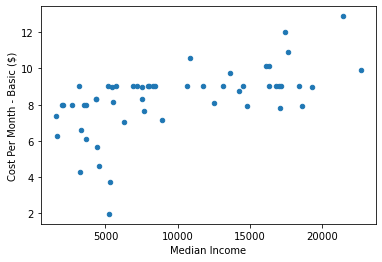

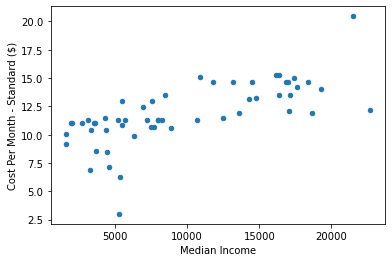

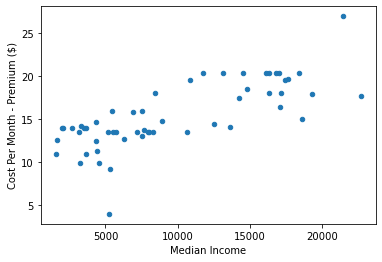

In [177]:
df.plot.scatter(x='Median Income', y='Cost Per Month - Basic ($)')
df.plot.scatter(x='Median Income', y='Cost Per Month - Standard ($)')
df.plot.scatter(x='Median Income', y='Cost Per Month - Premium ($)')

## Расчет средних 

In [178]:
df_all.groupby(by = 'Currency').mean()[['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']]

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Currency,,,
ARS Argentine peso,3.74000,6.300000,9.26000
AUD Australian dollar,7.84000,12.120000,16.39000
BGN Bulgarian lev,9.03000,11.290000,13.54000
BOB Boliviano,7.99000,10.990000,13.99000
BRL Brazilian real,4.61000,7.110000,9.96000
CAD Canadian dollar,7.91000,11.870000,15.03000
CHF Swiss franc,12.88000,20.460000,26.96000
CLP Chilean peso,7.07000,9.910000,12.74000
COP Colombian peso,4.31000,6.860000,9.93000


In [179]:
df_all.groupby(by = 'Continent').mean()[['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']]

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Continent,,,
Africa,6.260000,10.050000,12.580000
Asia,7.305556,10.164444,12.794444
Europe,9.314839,13.452258,17.773226
North America,7.900000,11.454000,14.648000
Oceania,8.320000,12.325000,16.665000
South America,6.388750,9.276250,12.196250


In [180]:
df_all.groupby(by = 'Continent').mean()[['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']]

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Continent,,,
Africa,6.260000,10.050000,12.580000
Asia,7.305556,10.164444,12.794444
Europe,9.314839,13.452258,17.773226
North America,7.900000,11.454000,14.648000
Oceania,8.320000,12.325000,16.665000
South America,6.388750,9.276250,12.196250


## Сколько стоит подписка относительно среднего дохода в Чехии 

Не совсем понял, что именно требуется посчитать. Но посчитал так: стоимость подписки в Чехии деленная на средний доход во всем мире

In [182]:
average_income_Czechia = float(df_all.mean()[['Median Income']])

price_basic_cz = float(df_all['Cost Per Month - Basic ($)'][df_all['Country'] == 'Czechia'])/average_income_Czechia
price_standart_cz = float(df_all['Cost Per Month - Standard ($)'][df_all['Country'] == 'Czechia'])/average_income_Czechia
price_premium_cz = float(df_all['Cost Per Month - Premium ($)'][df_all['Country'] == 'Czechia'])/average_income_Czechia

print(f'Сколько стоит базовая подписка относительно среднего дохода в Чехии = {price_basic_cz}')
print(f'Сколько стоит стандартная подписка относительно среднего дохода в Чехии = {price_standart_cz}')                                                                                                        
print(f'Сколько стоит примальная подписка относительно среднего дохода в Чехии = {price_premium_cz}')

Сколько стоит базовая подписка относительно среднего дохода в Чехии = 0.0009095012133328304
Сколько стоит стандартная подписка относительно среднего дохода в Чехии = 0.0011834845913017238
Сколько стоит примальная подписка относительно среднего дохода в Чехии = 0.0014574679692706172


## Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?

In [183]:
df_library_asc = df_all.sort_values(by = 'Total Library Size', ascending = False)[['Country', 'Total Library Size']]
df_library_asc.head(5)

,Country,Total Library Size
12,Czechia,7325
51,Slovakia,7035
24,Hungary,6884
6,Bulgaria,6797
61,United Kingdom,6643


## Какой процент среднего дохода россиянина будет составлять подписка Netflix? 

In [184]:
average_income_Russia = float(df_all['Median Income'][df_all['Country'] == 'Russia'])

price_basic_ru = float(df_all['Cost Per Month - Basic ($)'][df_all['Country'] == 'Russia'])/average_income_Russia*100
price_standart_ru = float(df_all['Cost Per Month - Standard ($)'][df_all['Country'] == 'Russia'])/average_income_Russia*100
price_premium_ru = float(df_all['Cost Per Month - Premium ($)'][df_all['Country'] == 'Russia'])/average_income_Russia*100

print(f'базовая подписка = {price_basic_ru}%')
print(f'стандартная подписка = {price_standart_ru}%')                                                                                                        
print(f'премиальная подписка = {price_premium_ru}%')

базовая подписка = 0.14771075581395351%
стандартная подписка = 0.19694767441860464%
премиальная подписка = 0.24636627906976746%


## На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)

In [190]:
df_all['Cost Per Title B'] = df_all['Cost Per Month - Basic ($)']/df_all['Total Library Size']
df_all['Cost Per Title S'] = df_all['Cost Per Month - Standard ($)']/df_all['Total Library Size']
df_all['Cost Per Title P'] = df_all['Cost Per Month - Premium ($)']/df_all['Total Library Size']

table_cost_per_title_B = df_all.sort_values(by='Cost Per Title B',ascending=True)
table_cost_per_title_S = df_all.sort_values(by='Cost Per Title S',ascending=True)
table_cost_per_title_P = df_all.sort_values(by='Cost Per Title P',ascending=True)

print('Basic: ', table_cost_per_title_B[table_cost_per_title_B['Country'] == 'Russia'].index)
print('Standart: ', table_cost_per_title_S[table_cost_per_title_S['Country'] == 'Russia'].index)
print('Premium: ', table_cost_per_title_P[table_cost_per_title_P['Country'] == 'Russia'].index)


Basic:  Int64Index([48], dtype='int64')
Standart:  Int64Index([48], dtype='int64')
Premium:  Int64Index([48], dtype='int64')


Видим, что Россия находится на 48 месте по всем видам подписок

## В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего? 

In [193]:
df_basic_asc = df_all.sort_values(by = 'Cost Per Month - Basic ($)', ascending = True)['Country']
df_basic_asc.head(1)

59    Turkey
Name: Country, dtype: object